✅ GIF saved as 'bivariate_conditional_slice_contrast.gif'


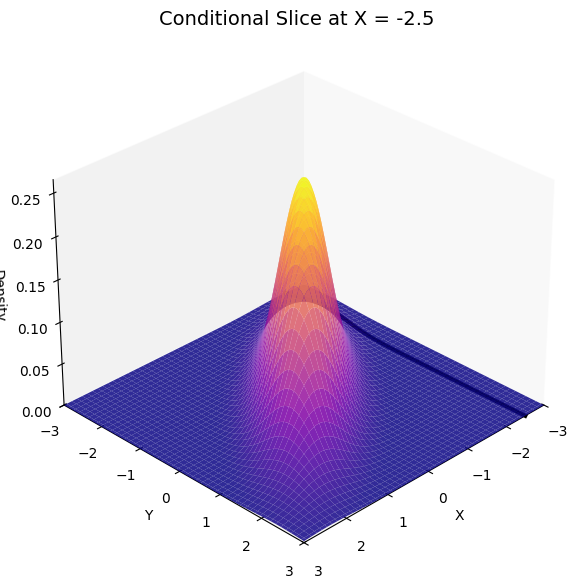

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.stats import multivariate_normal
import os

# Bivariate normal parameters
mu = np.array([0, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]])

# Create grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Joint distribution
rv = multivariate_normal(mean=mu, cov=cov)
Z = rv.pdf(pos)

# Set up figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.6, edgecolor='none')

# Initial slice line
slice_line, = ax.plot([], [], [], color='red', linewidth=3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('Conditional Slice of Bivariate Normal')

# Animation function
x_vals = np.linspace(-2.5, 2.5, 60)
def update(frame):
    x_fixed = np.round(x_vals[frame], 2)
    mu_x, mu_y = mu
    sigma_xx = cov[0, 0]
    sigma_yy = cov[1, 1]
    sigma_xy = cov[0, 1]

    cond_mu_y = mu_y + sigma_xy / sigma_xx * (x_fixed - mu_x)
    cond_var_y = sigma_yy - sigma_xy**2 / sigma_xx
    y_vals = np.linspace(-3, 3, 100)
    z_vals = multivariate_normal.pdf(
        np.column_stack((np.full_like(y_vals, x_fixed), y_vals)),
        mean=mu, cov=cov
    )

    slice_line.set_data(np.full_like(y_vals, x_fixed), y_vals)
    slice_line.set_3d_properties(z_vals)
    ax.set_title(f'Conditional PDF Slice at X = {x_fixed}')
    return slice_line,

# Create animation
ani = FuncAnimation(fig, update, frames=len(x_vals), interval=100)

# Save as GIF
output_path = "bivariate_conditional_slice.gif"
ani.save(output_path, writer=PillowWriter(fps=10))
print(f"Saved animation to {os.path.abspath(output_path)}")
